In [1]:
import pandas as pd
import yfinance as yf

In [2]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)


stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-08,4.929742,4.963990,4.827742,4.888049,460921194
2005-02-09,4.754531,5.003202,4.701918,4.982356,689434520
2005-02-10,4.665188,4.770166,4.597437,4.764210,762154073
2005-02-11,4.650794,4.772897,4.617787,4.632429,526606480
2005-02-14,4.789524,4.791758,4.491963,4.537875,1548269624


In [4]:
google_data.shape

(5033, 5)

In [5]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,49.510712,50.011888,48.994323,49.487878,1.067610e+08
std,47.509843,48.006563,47.008968,47.474996,1.392073e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.401436,13.525771,13.273872,13.404412,2.637800e+07
50%,28.329649,28.616330,28.082718,28.378837,4.958600e+07
75%,66.567810,67.257090,65.639153,66.372518,1.305876e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-02-08 to 2025-02-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [7]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

<Figure size 1500x500 with 0 Axes>

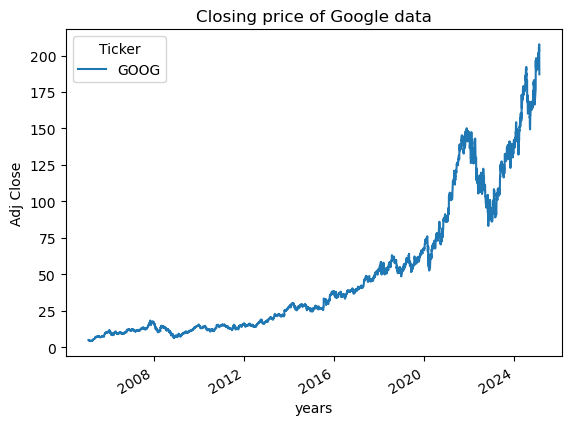

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")
plt.show()

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()

In [10]:

google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

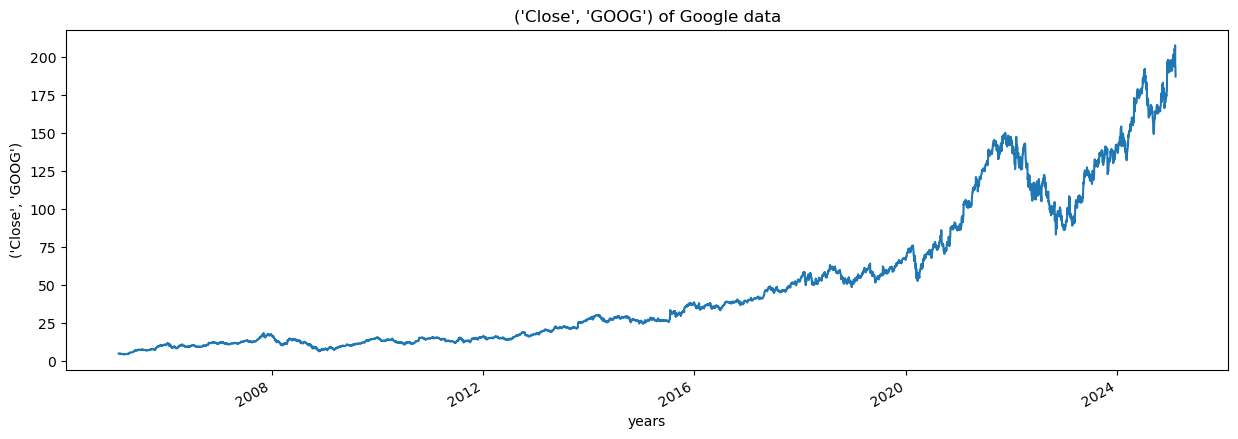

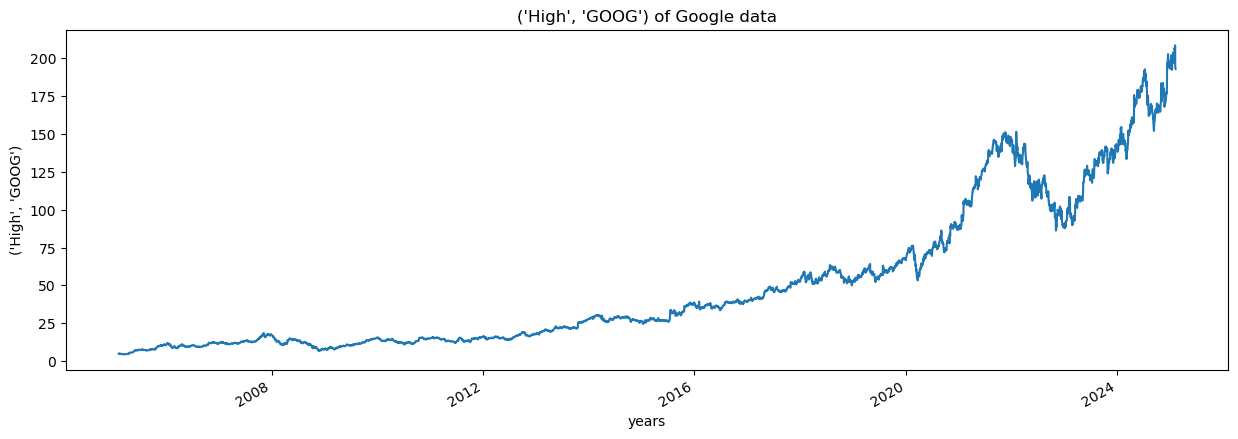

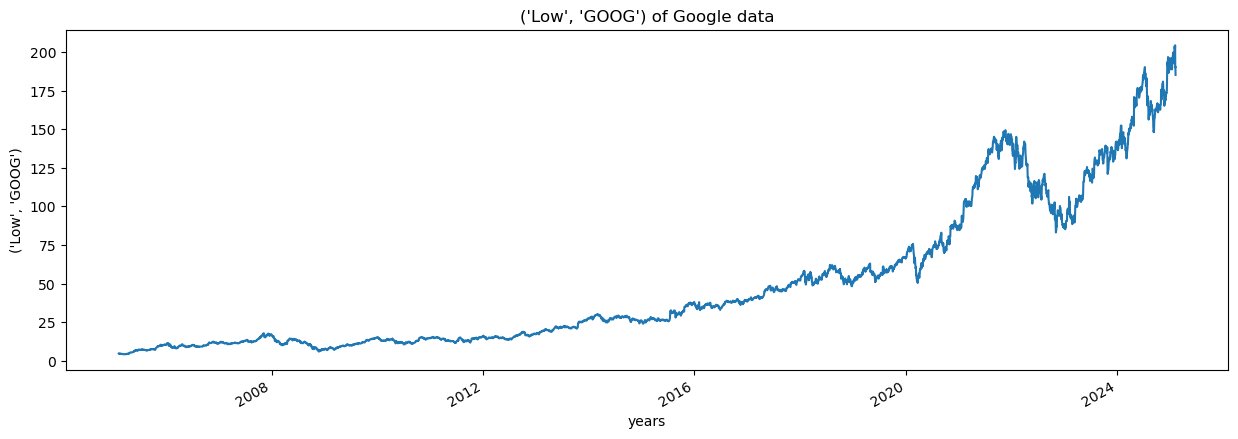

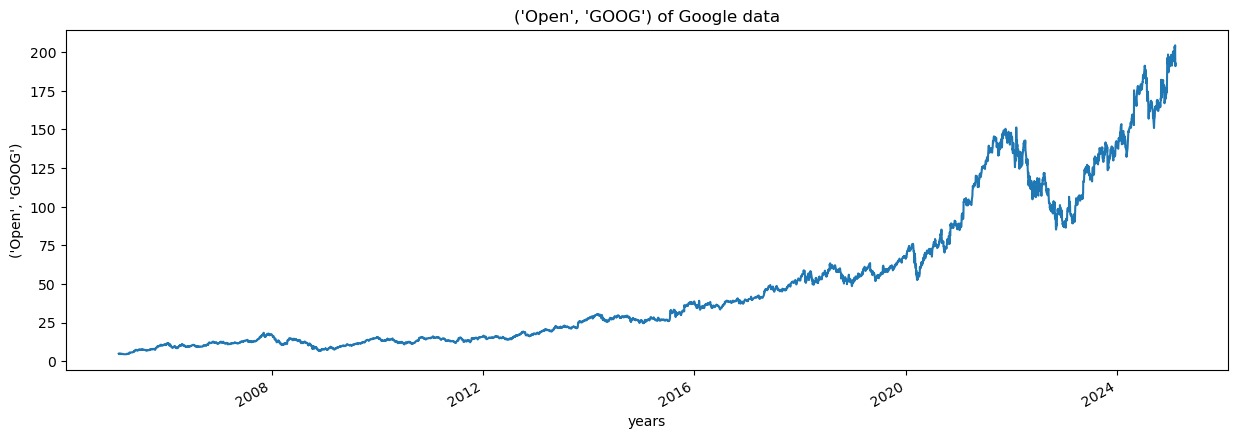

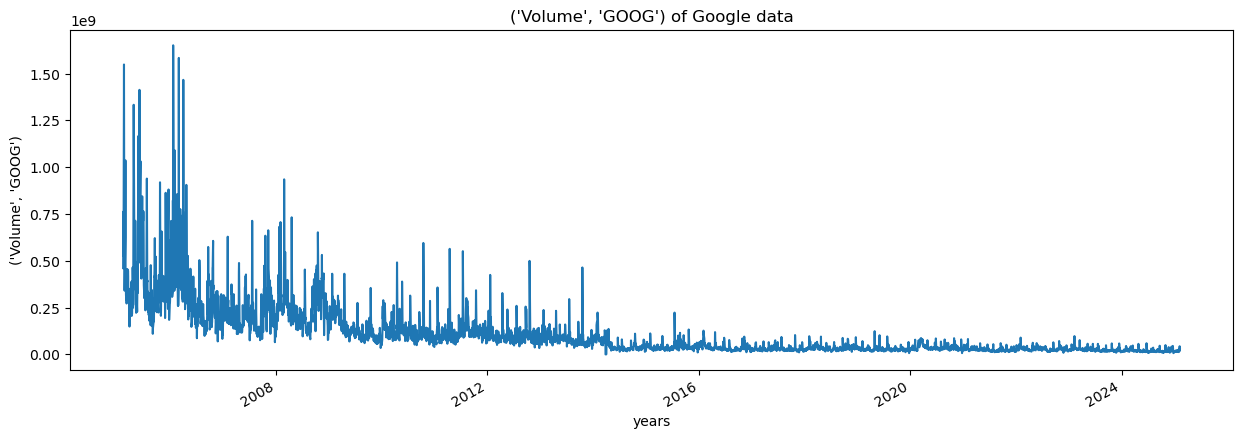

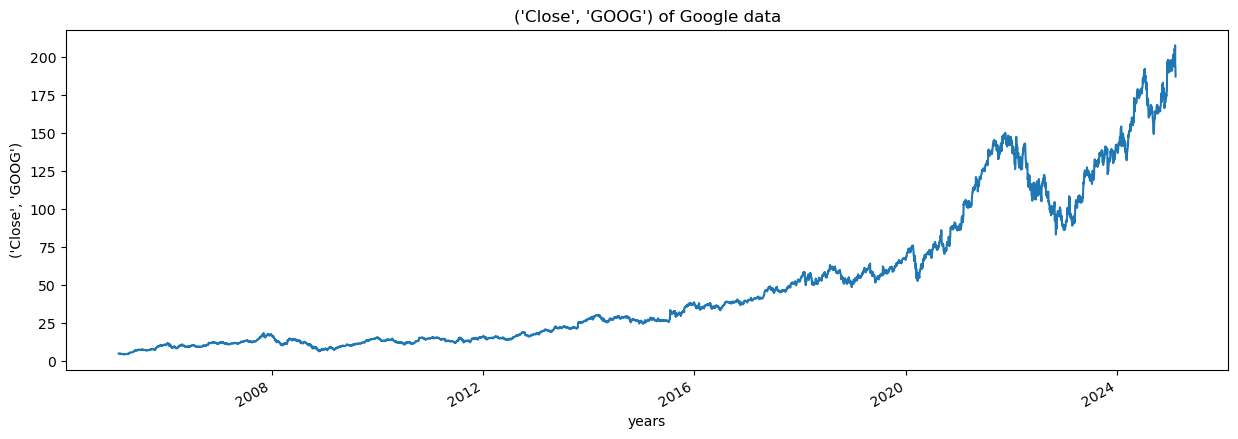

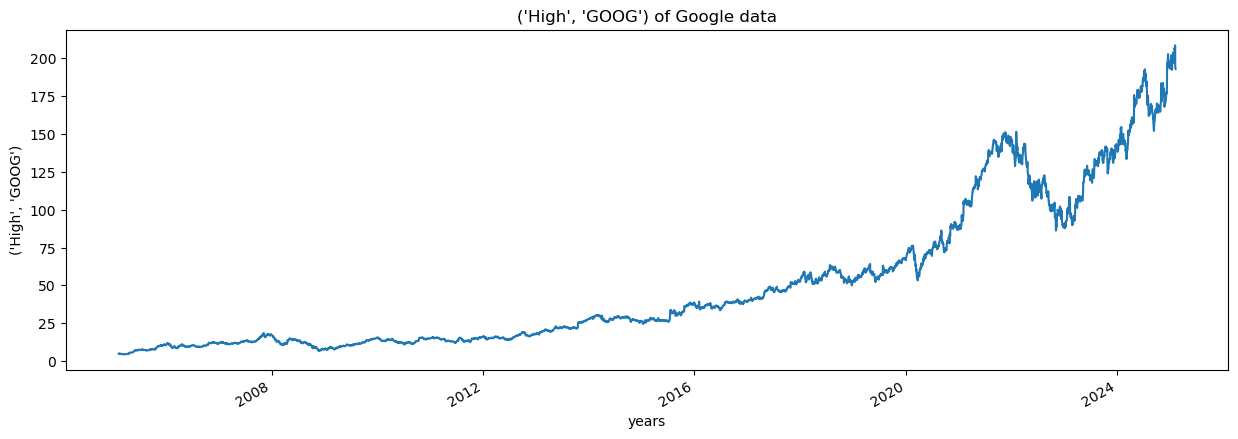

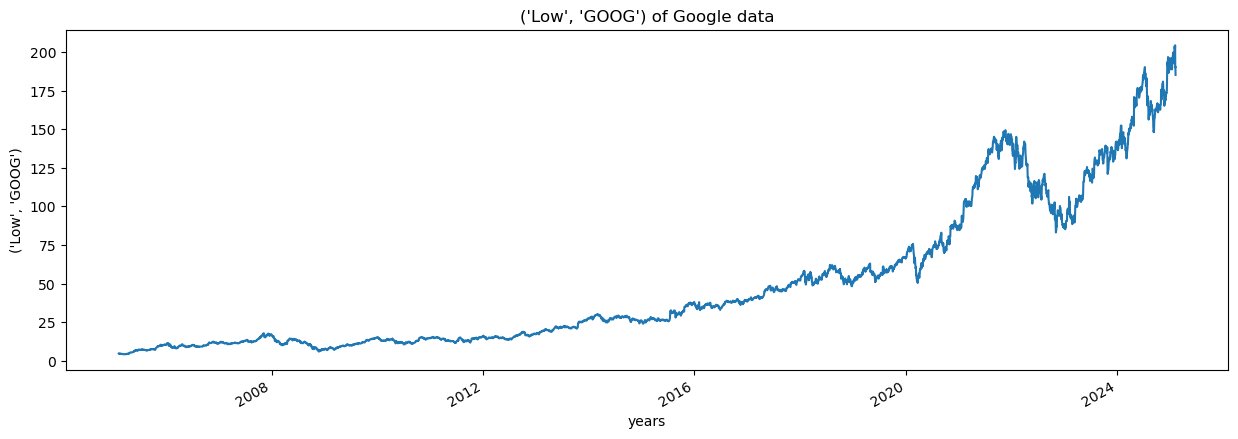

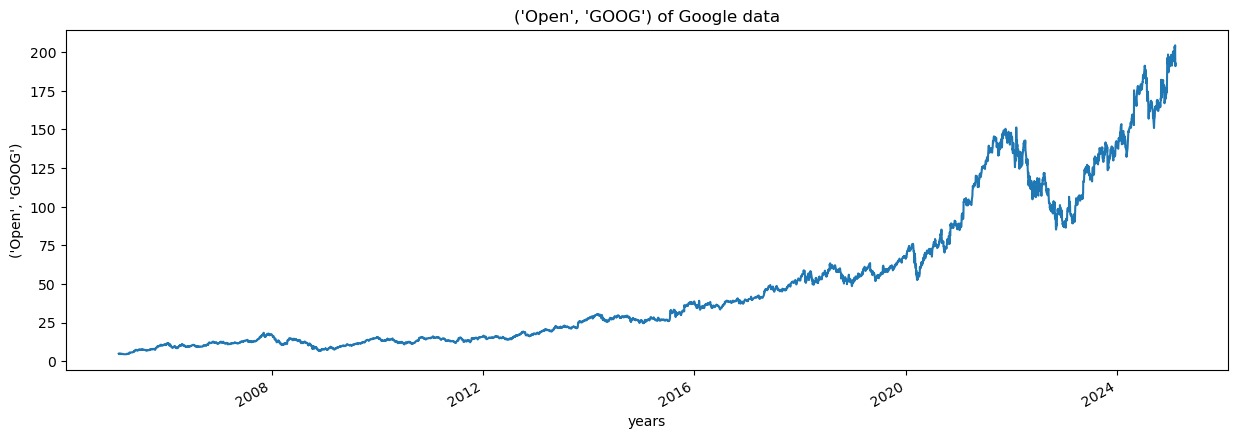

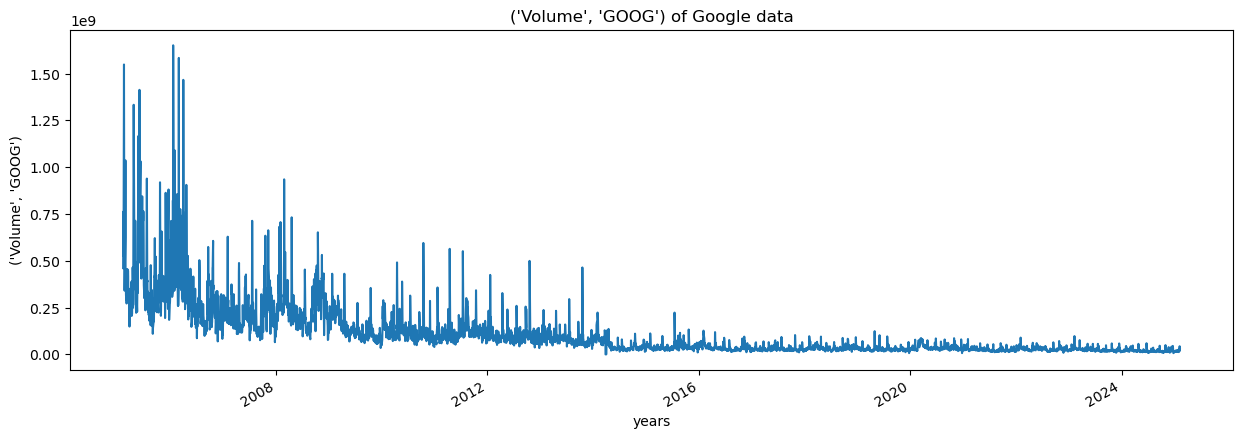

In [13]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [14]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 227
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [15]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [16]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-01-30         NaN
2006-01-31         NaN
2006-02-01         NaN
2006-02-02         NaN
2006-02-03    7.467366
Name: MA_for_250_days, dtype: float64

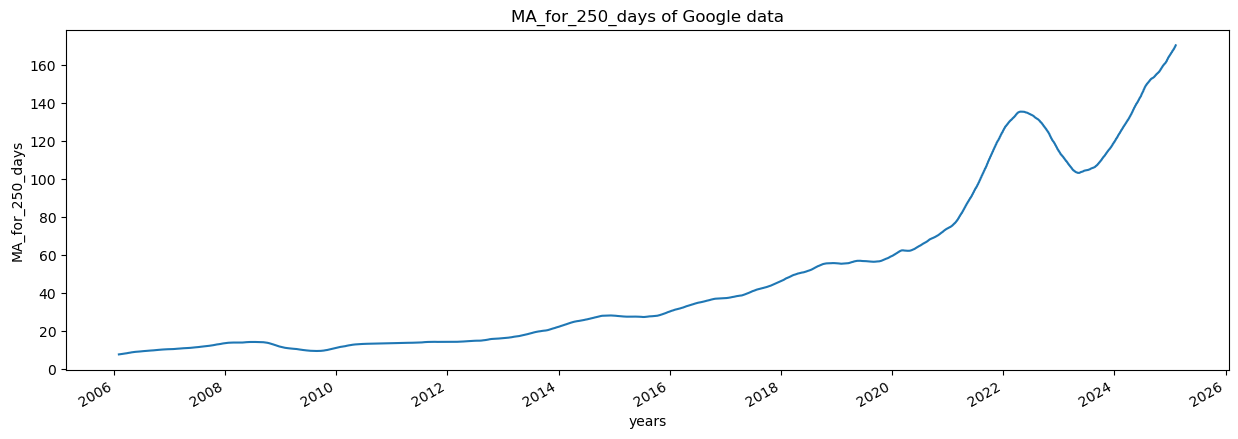

In [17]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

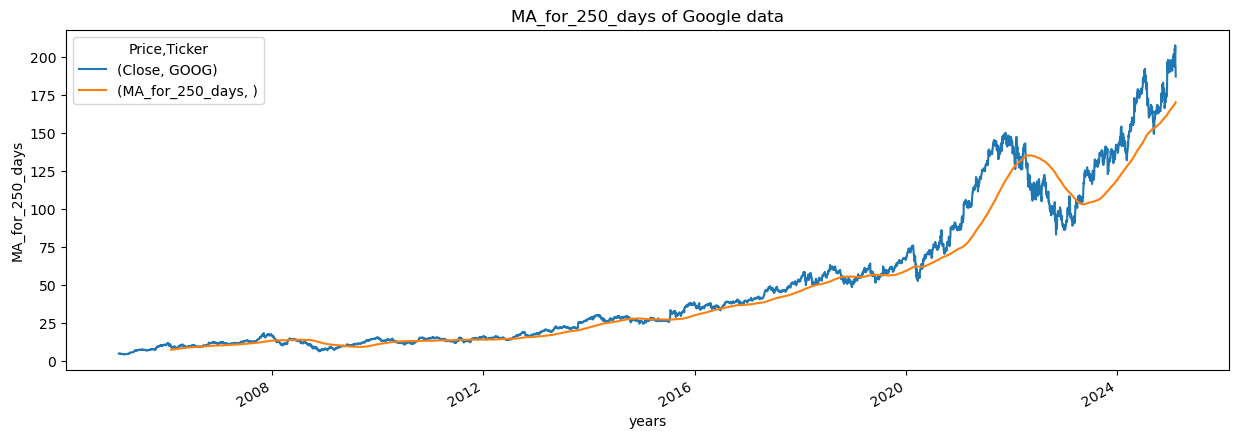

In [18]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

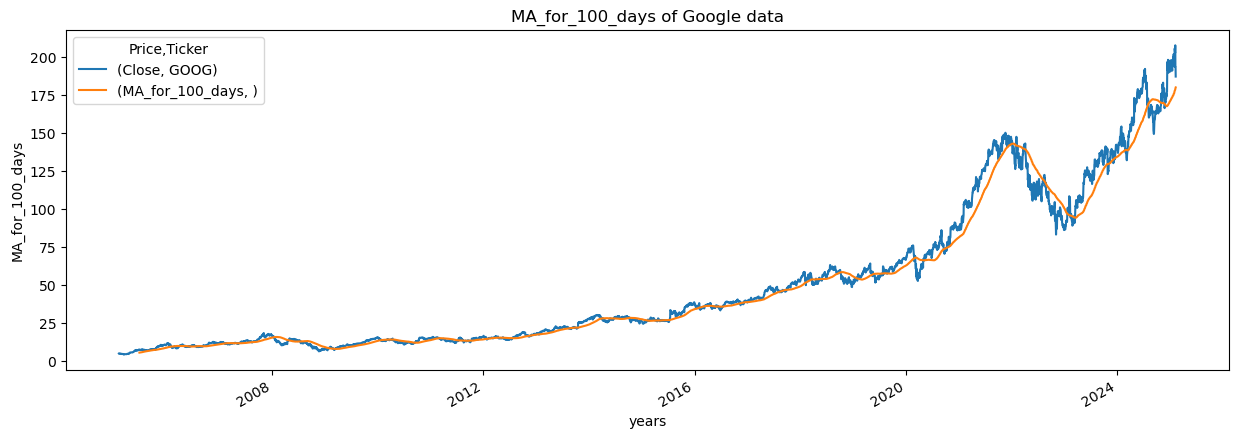

In [19]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

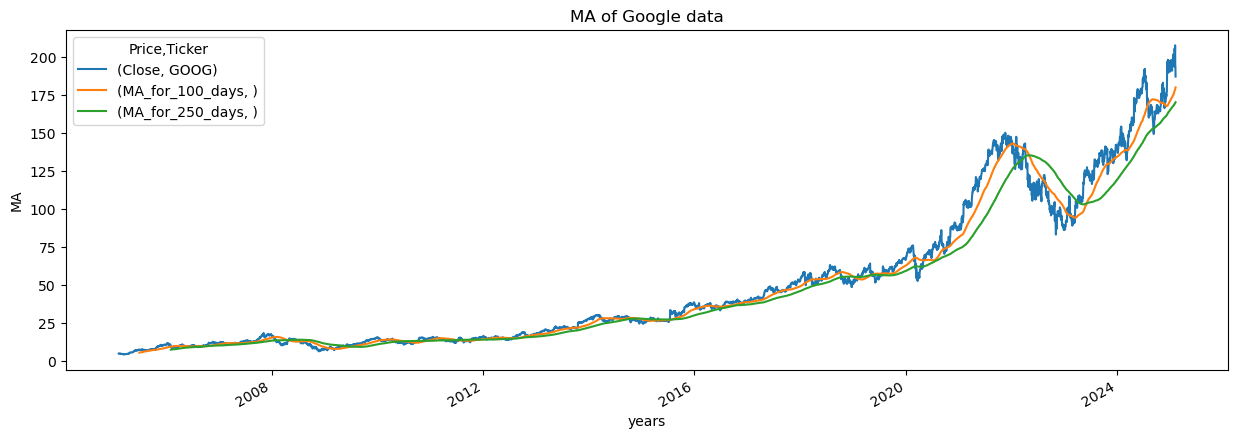

In [21]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [22]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-08,4.929742,NaN
2005-02-09,4.754531,-0.035542
2005-02-10,4.665188,-0.018791
2005-02-11,4.650794,-0.003085
2005-02-14,4.789524,0.029829


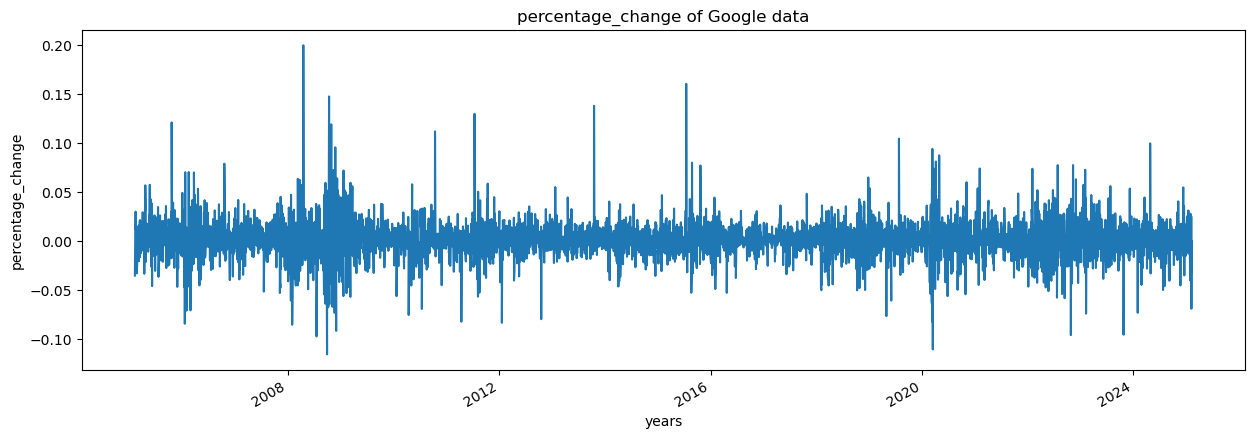

In [23]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [24]:
Adj_close_price = google_data[['Close']]

In [25]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([207.71000671]), array([4.34280968]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00288607],
       [0.00202452],
       [0.0015852 ],
       ...,
       [0.92914293],
       [0.92919208],
       [0.89885287]])

In [27]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [28]:
x_data[0],y_data[0]

(array([[2.88607341e-03],
        [2.02452368e-03],
        [1.58520469e-03],
        [1.51442492e-03],
        [2.19659025e-03],
        [2.46994126e-03],
        [2.85800722e-03],
        [2.79577158e-03],
        [2.80187252e-03],
        [1.99889600e-03],
        [2.31374369e-03],
        [1.69625486e-03],
        [1.32771565e-03],
        [1.58642629e-03],
        [1.35090014e-03],
        [1.24351475e-03],
        [1.46683200e-03],
        [1.33137574e-03],
        [1.68649149e-03],
        [1.24595091e-03],
        [7.76127240e-04],
        [6.08944708e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44422068e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18773282e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84666675e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.25693822e-03],
        [1.6

In [30]:
int(len(x_data)*0.7)


3453

In [31]:
4908-100-int(len(x_data)*0.7)

1355

In [32]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [35]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 3.4 MB/s eta 0:01:56
   ---------------------------------------- 1.3/390.3 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 2.1/390.3 MB 3.7 MB/s eta 0:01:46
   ---------------------------------------- 2.9/390.3 MB 3.7 MB/s eta 0:01:44
   ---------------------------------------- 3.7/390.3 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 4.5/390.3 MB 3.8 MB/s eta 0:01:43
    --------------------------------------- 5.2/390.3 MB 3.7 MB/s eta 0:01:44
    --------------------------------------- 6.0/390.3 MB 3.8 MB/s eta 0:01:43
    --------------------------------------- 7.1/390.3 MB 3.8 MB/s eta 0:01:42
    --------------------------------------- 7.6/390.3 MB 3.8 MB/s eta 0:01:41
    --------------------------------------- 8.7/390.3 MB 3.8 MB/s eta 0:01:41
    --------------------------------------- 9.4/390.3 MB 3.8 MB/s eta 0

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 58s 16ms/step - loss: 1.9503e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 52s 15ms/step - loss: 4.0363e-05


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [42]:
predictions

array([[0.29156688],
       [0.29069284],
       [0.2877656 ],
       ...,
       [0.983272  ],
       [0.958375  ],
       [0.93999374]], dtype=float32)

In [43]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 63.63795 ],
       [ 63.460197],
       [ 62.86489 ],
       ...,
       [204.30807 ],
       [199.24484 ],
       [195.5067  ]], dtype=float32)

In [44]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.0592041 ],
       [ 59.43643951],
       [ 59.01893997],
       ...,
       [193.30000305],
       [193.30999756],
       [187.13999939]])

In [45]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [46]:
rmse

4.538101845101328

In [47]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-22,60.059204,63.637951
2019-03-25,59.436440,63.460197
2019-03-26,59.018940,62.864891
2019-03-27,58.441017,62.260361
2019-03-28,58.215324,61.686184


<Figure size 640x480 with 0 Axes>

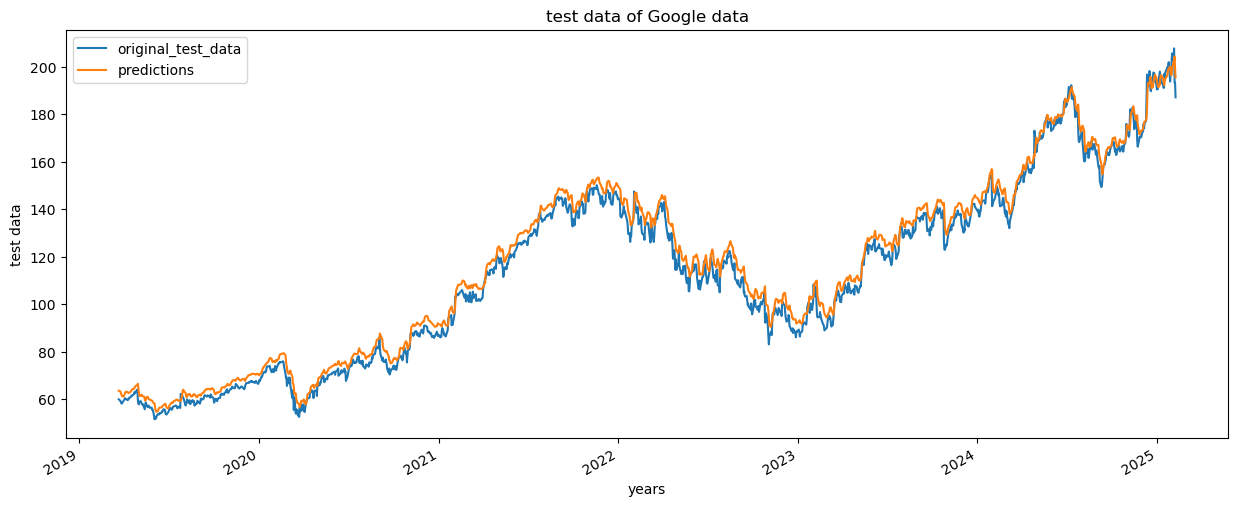

In [48]:

plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

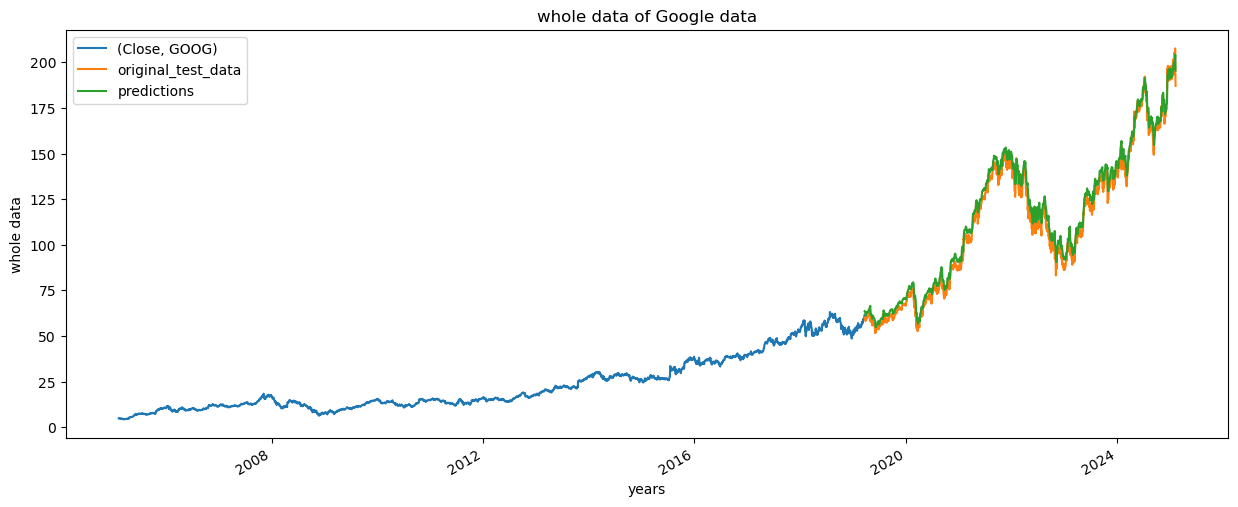

In [49]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [50]:
model.save("Latest_stock_price_model.keras")